# IS-4100: Simple Linear Regression (SLR) Assignment

In this assignment, you will explore the relationship between two variables using simple linear regression. You'll work with each of your eight team's data over the last year or two. You can pick any two variables you are interested in comparing. By the end of this assignment, you'll be able to:

1. Load and preprocess NFL data.
2. Perform exploratory data analysis (EDA) to understand the dataset.
3. Build and evaluate simple linear regression models.
4. Interpret the results and draw conclusions.

Be sure to submit notebook with all code cells executed or it'll be an automatic 0.

## Part 1: Environment Setup

In [ ]:
!pip install nfl_data_py
import numpy as np
import pandas as pd
import nfl_data_py as nfl
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 1.5.3 wh

## Part 2: EDA

**My Teams' 2023 Passer Rating Performance**

In [ ]:
teams = ['MIA', 'PIT', 'HOU', 'DEN', 'WAS', 'CHI', 'TB', 'SF']

pbp_2023 = nfl.import_pbp_data([2023])

team_passing_data = pbp_2023[(pbp_2023['posteam'].isin(teams)) & (pbp_2023['pass_attempt'] == 1)].copy()

team_passing_stats = team_passing_data.groupby('posteam').agg(
    completions=('complete_pass', 'sum'),
    attempts=('pass_attempt', 'count'),
    passing_yards=('passing_yards', 'sum'),
    touchdowns=('pass_touchdown', 'sum'),
    interceptions=('interception', 'sum')
).reset_index()

# passer_rating_function
def passer_rating_function(row):
    a = ((row['completions'] / row['attempts']) - 0.3) * 5
    b = ((row['passing_yards'] / row['attempts']) - 3) * 0.25
    c = (row['touchdowns'] / row['attempts']) * 20
    d = 2.375 - (row['interceptions'] / row['attempts']) * 25

    a = max(0, min(a, 2.375))
    b = max(0, min(b, 2.375))
    c = max(0, min(c, 2.375))
    d = max(0, min(d, 2.375))

    passer_rating = ((a + b + c + d) / 6) * 100
    return passer_rating

team_passing_stats['team_passer_rating'] = team_passing_stats.apply(passer_rating_function, axis=1)

team_passing_stats = team_passing_stats.sort_values(by='team_passer_rating', ascending=False)

print(team_passing_stats[['posteam', 'completions', 'attempts', 'passing_yards', 'touchdowns', 'interceptions', 'team_passer_rating']].to_string(index=False))


2023 done.
Downcasting floats.
posteam  completions  attempts  passing_yards  touchdowns  interceptions  team_passer_rating
     SF        403.0       638         5372.0        37.0           13.0          100.646552
    MIA        413.0       640         4897.0        31.0           16.0           93.470052
    HOU        408.0       699         5033.0        30.0            8.0           90.262876
     TB        412.0       698         4730.0        34.0           12.0           88.580468
    DEN        337.0       568         3566.0        28.0            9.0           87.514671
    PIT        345.0       584         3650.0        15.0           10.0           78.781393
    CHI        321.0       566         3421.0        19.0           15.0           74.676090
    WAS        407.0       703         4174.0        24.0           21.0           74.001304


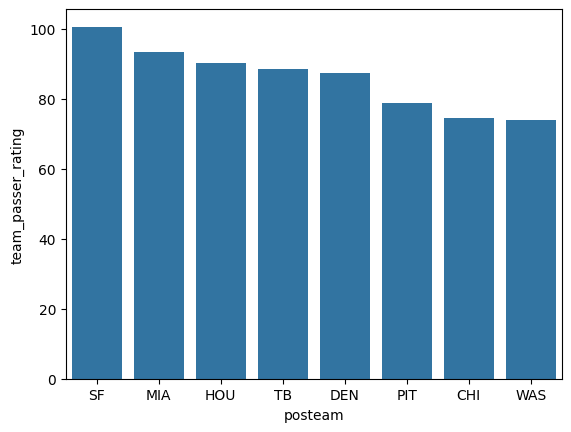

In [ ]:
sns.barplot(data = team_passing_stats,
                x = 'posteam',
                y = 'team_passer_rating')

plt.show()

**My Teams' Early 2024 Passer Rating Performance**

In [ ]:
pbp_2024 = nfl.import_pbp_data([2024])

team_passing_data24 = pbp_2024[(pbp_2024['posteam'].isin(teams)) & (pbp_2024['pass_attempt'] == 1)].copy()

team_passing_stats24 = team_passing_data24.groupby('posteam').agg(
    completions=('complete_pass', 'sum'),
    attempts=('pass_attempt', 'count'),
    passing_yards=('passing_yards', 'sum'),
    touchdowns=('pass_touchdown', 'sum'),
    interceptions=('interception', 'sum')
).reset_index()

team_passing_stats24['team_passer_rating'] = team_passing_stats24.apply(passer_rating_function, axis=1)

team_passing_stats24 = team_passing_stats24.sort_values(by='team_passer_rating', ascending=False)

print(team_passing_stats24[['posteam', 'completions', 'attempts', 'passing_yards', 'touchdowns', 'interceptions', 'team_passer_rating']].to_string(index=False))

2024 done.
Downcasting floats.
posteam  completions  attempts  passing_yards  touchdowns  interceptions  team_passer_rating
     SF         69.0       105          842.0         4.0            1.0           98.988095
     TB         61.0        95          637.0         6.0            2.0           95.811404
    PIT         55.0        81          518.0         2.0            1.0           88.400206
    WAS         40.0        61          410.0         0.0            0.0           84.733607
    HOU         75.0       124          801.0         4.0            2.0           83.434140
    MIA         68.0       119          749.0         2.0            3.0           71.025910
    DEN         71.0       117          600.0         0.0            4.0           59.775641
    CHI         70.0       133          630.0         2.0            4.0           58.161028


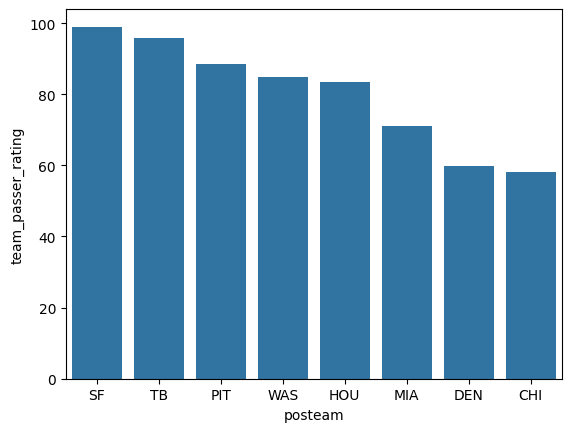

In [ ]:
sns.barplot(data = team_passing_stats24,
                x = 'posteam',
                y = 'team_passer_rating')

plt.show()

## Part 3: Build SLR Models

**Is there correlation between Passer Rating and Winning? (2016-2024)**

Simple Linear Regression Model

In [ ]:
seasons = seasons = range(2016,2024 +1)
data = nfl.import_pbp_data(seasons)

qb_data = data[data['pass_attempt'] == 1].copy()

qb_pass_attempts = qb_data.groupby(['passer_player_name', 'game_id']).agg(
    pass_attempts=('pass_attempt', 'count')
).reset_index()

games = qb_pass_attempts[qb_pass_attempts['pass_attempts'] > 12]

qb_data = qb_data.merge(games[['passer_player_name', 'game_id']],
                          on=['passer_player_name', 'game_id'],
                          how='inner')

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.


In [ ]:
# Win or Lose Function
def game_result(row):
    if row['posteam'] == row['home_team']:
        return 1 if row['home_score'] > row['away_score'] else 0
    else:
        return 1 if row['away_score'] > row['home_score'] else 0

qb_data['team_won'] = qb_data.apply(game_result, axis=1)

In [ ]:
qb_stats = qb_data.groupby(['passer_player_name', 'game_id', 'team_won']).agg(
    completions=('complete_pass', 'sum'),
    attempts=('pass_attempt', 'count'),
    passing_yards=('passing_yards', 'sum'),
    touchdowns=('pass_touchdown', 'sum'),
    interceptions=('interception', 'sum')
).reset_index()

In [ ]:
qb_stats['passer_rating'] = qb_stats.apply(passer_rating_function, axis=1)

qb_stats = qb_stats.sort_values(by=['passer_player_name', 'game_id'])

In [ ]:
qb_pr_avg = qb_stats.groupby(
    ['team_won']
).agg(
    {
        'passer_rating': ['mean']
    }
)

qb_pr_avg.columns = list(
    map(
        "_".join, qb_pr_avg.columns
    )
)

qb_pr_avg.reset_index(inplace=True)

print(qb_pr_avg)

   team_won  passer_rating_mean
0         0           72.624640
1         1           97.611594


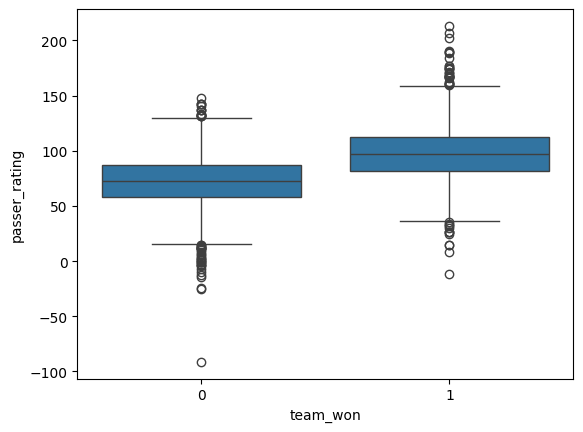

In [ ]:
sns.boxplot(data = qb_stats,
                x = 'team_won',
                y = 'passer_rating')

plt.show()

- Biggest outlier: **CAR** vs. **NO** - 01/08/23
  - QB - Sam Darnold: 5/15, 43 yards, 0 TD, 2 INT, *2.8 Passer Rating*
  - **Carolina** 10 - **New Orleans** 7

In [ ]:
# Linear Regression Results
pr_winning = smf.ols(
    formula = 'passer_rating ~ team_won',
    data = qb_stats
)

print(pr_winning.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          passer_rating   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     1361.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.55e-261
Time:                        14:57:27   Log-Likelihood:                -20831.
No. Observations:                4578   AIC:                         4.167e+04
Df Residuals:                    4576   BIC:                         4.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.6246      0.474    153.325      0.0

**Is there correlation between Passer Rating and Winning? (2016-2024)**

Logistic Regression Model

Accuracy: 0.71
Confusion Matrix:
[[337 124]
 [144 311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       461
           1       0.71      0.68      0.70       455

    accuracy                           0.71       916
   macro avg       0.71      0.71      0.71       916
weighted avg       0.71      0.71      0.71       916



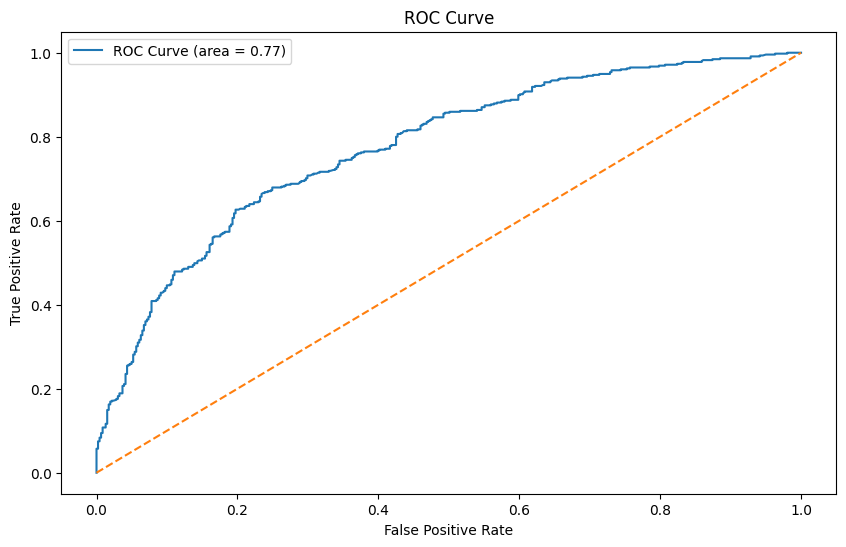

In [ ]:
qb_stats.dropna(inplace=True)

X = qb_stats[['passer_rating']]
y = qb_stats['team_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##**NFL Week 3 Predictions**

**Model's predictions given matchup results from 2016-2023**

In [ ]:
seasons = seasons = range(2016,2024 +1)
data = nfl.import_pbp_data(seasons)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.


In [ ]:
qb_data = data[data['pass_attempt'] == 1].copy()

qb_pass_attempts = qb_data.groupby(['passer_player_name', 'game_id']).agg(
    pass_attempts=('pass_attempt', 'count')
).reset_index()

filtered_games = qb_pass_attempts[qb_pass_attempts['pass_attempts'] > 3]

qb_data = qb_data.merge(games[['passer_player_name', 'game_id']],
                          on=['passer_player_name', 'game_id'],
                          how='inner')

qb_data['team_won'] = qb_data.apply(game_result, axis=1)

qb_stats = qb_data.groupby(['passer_player_name', 'game_id', 'team_won', 'posteam', 'defteam']).agg(
    completions=('complete_pass', 'sum'),
    attempts=('pass_attempt', 'count'),
    passing_yards=('passing_yards', 'sum'),
    touchdowns=('pass_touchdown', 'sum'),
    interceptions=('interception', 'sum')
).reset_index()

qb_stats['passer_rating'] = qb_stats.apply(passer_rating_function, axis=1)


my_teams = ['MIA', 'PIT', 'HOU', 'DEN', 'WAS', 'CHI', 'TB', 'SF']
opponent_teams = ['SEA', 'LAC', 'MIN', 'TB', 'CIN', 'IND', 'DEN', 'LA']

team_matchups = dict(zip(my_teams, opponent_teams))

filtered_data = qb_stats[(qb_stats['posteam'].isin(my_teams)) &
                        (qb_stats['defteam'].isin(opponent_teams))]

filtered_data = filtered_data[filtered_data.apply(
    lambda row: team_matchups[row['posteam']] == row['defteam'], axis=1)]

mean_passer_ratings = filtered_data.groupby(['posteam', 'defteam'])['passer_rating'].mean().reset_index()

mean_passer_ratings = mean_passer_ratings.sort_values(by='passer_rating', ascending=False)

print(mean_passer_ratings)

  posteam defteam  passer_rating
5      SF      LA      91.103219
4     PIT     LAC      90.390683
0     CHI     IND      89.536867
7     WAS     CIN      86.293860
1     DEN      TB      78.833774
2     HOU     MIN      71.566653
6      TB     DEN      71.493056
3     MIA     SEA      65.212615


In [ ]:
matchups = pd.DataFrame({
    'passer_rating': [97.335271, 90.210453, 88.654673, 86.293860, 76.489533, 75.773810, 72.708333, 63.894973]
})

predictions = logreg.predict(matchups)
predicted_probabilities = logreg.predict_proba(matchups)[:, 1]

for i, (game, pred, prob) in enumerate(zip(['CHI vs IND', 'PIT vs LAC', 'SF  vs LA ', 'WAS vs CIN', 'HOU vs MIN', 'DEN vs TB ', 'TB  vs DEN', 'MIA vs SEA'], predictions, predicted_probabilities)):
    result = 'Win ' if pred == 1 else 'Lose'
    print(f'{game}: Prediction: {result} (Probability of Win: {prob:.2f})')

CHI vs IND: Prediction: Win  (Probability of Win: 0.63)
PIT vs LAC: Prediction: Win  (Probability of Win: 0.55)
SF  vs LA : Prediction: Win  (Probability of Win: 0.53)
WAS vs CIN: Prediction: Win  (Probability of Win: 0.50)
HOU vs MIN: Prediction: Lose (Probability of Win: 0.39)
DEN vs TB : Prediction: Lose (Probability of Win: 0.38)
TB  vs DEN: Prediction: Lose (Probability of Win: 0.34)
MIA vs SEA: Prediction: Lose (Probability of Win: 0.26)


**Model's predictions given early 2024 Performance**

In [ ]:
print(team_passing_stats24[['posteam', 'completions', 'attempts', 'passing_yards', 'touchdowns', 'interceptions', 'team_passer_rating']].to_string(index=False))

posteam  completions  attempts  passing_yards  touchdowns  interceptions  team_passer_rating
     SF         69.0       105          842.0         4.0            1.0           98.988095
     TB         61.0        95          637.0         6.0            2.0           95.811404
    PIT         55.0        81          518.0         2.0            1.0           88.400206
    WAS         40.0        61          410.0         0.0            0.0           84.733607
    HOU         75.0       124          801.0         4.0            2.0           83.434140
    MIA         68.0       119          749.0         2.0            3.0           71.025910
    DEN         71.0       117          600.0         0.0            4.0           59.775641
    CHI         70.0       133          630.0         2.0            4.0           58.161028


In [ ]:
matchups = pd.DataFrame({
    'passer_rating': [46.326754, 86.569149, 84.853604, 84.733607, 95.083333, 48.585391, 115.265152, 73.225309]
})

predictions = logreg.predict(matchups)
predicted_probabilities = logreg.predict_proba(matchups)[:, 1]

for i, (game, pred, prob) in enumerate(zip(['CHI vs IND', 'PIT vs LAC', 'SF  vs LA ', 'WAS vs CIN', 'HOU vs MIN', 'DEN vs TB ', 'TB  vs DEN', 'MIA vs SEA'], predictions, predicted_probabilities)):
    result = 'Win ' if pred == 1 else 'Lose'
    print(f'{game}: Prediction: {result} (Win Probability: {prob:.2f})')

CHI vs IND: Prediction: Lose (Win Probability: 0.13)
PIT vs LAC: Prediction: Win  (Win Probability: 0.51)
SF  vs LA : Prediction: Lose (Win Probability: 0.49)
WAS vs CIN: Prediction: Lose (Win Probability: 0.48)
HOU vs MIN: Prediction: Win  (Win Probability: 0.61)
DEN vs TB : Prediction: Lose (Win Probability: 0.14)
TB  vs DEN: Prediction: Win  (Win Probability: 0.81)
MIA vs SEA: Prediction: Lose (Win Probability: 0.35)


**Model's predictions given the actual Passer Rating Input**

In [ ]:
matchups = pd.DataFrame({
    'passer_rating': [80.8, 96.0, 137.1, 68.6, 85.0, 83.3, 78.4]
})

predictions = logre.predict(matchups)
predicted_probabilities = logreg.predict_proba(matchups)[:, 1]

for i, (game, pred, prob) in enumerate(zip(['CHI vs IND', 'PIT vs LAC', 'SF  vs LA ', 'HOU vs MIN', 'DEN vs TB ', 'TB  vs DEN', 'MIA vs SEA'], predictions, predicted_probabilities)):
    result = 'Win ' if pred == 1 else 'Lose'
    print(f'{game}: Model would have predicted: {result} (Win Probability: {prob:.2f})')

NameError: name 'pd' is not defined

## Part 4: Interpretation and Discussion

*Model 1 Results (Recent Matchups): 4-3

*Model 2 Results (2024 Stats): 4-3

*Model 3 Results (Actual PR Input): 4-3




**Takeaways**

- The 49ers-Rams game is a major outlier in my model, as QB Brock Purdy recorded a 137.1 passer rating, yet SF still lost. That QB performance results in a win 92% of the time!
- Passer Rating is a strong indicator of how a game will result, but is not an end-all-be-all.
- While more difficult, it would be more valuable to project a player's passer rating output using factors that include the strength of the other team's defense.
